# <font color=#C4C4C4> Bank Term Deposit Prediction using ML

## Introduction

This dataset,Bank Term Deposits, is a collection of data related to the direct marketing campaigns conducted by a Portuguese banking institution. These campaigns primarily involved phone calls with customers, and the objective was to determine whether or not a customer would subscribe to a term deposit offered by the bank.

# 1. Libraries <a id='seccion1'></a>

In [1]:
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

# 2. Data Exploratory <a id='seccion2'></a>

For this specifically notebook I use the campaign success as a total quantity of all the different campaign implemented. 

In [2]:
df = pd.read_csv('/kaggle/input/bank-term-deposit-predictions/train.csv')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.isna().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df['poutcome']

0        unknown
1        unknown
2        unknown
3        unknown
4        unknown
          ...   
45206    unknown
45207    unknown
45208    success
45209    unknown
45210      other
Name: poutcome, Length: 45211, dtype: object

In [9]:
#Target Evaluation 

df['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [10]:
df['month'].value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [11]:
df[['age','balance','day','duration','campaign','pdays', 'previous']]

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [12]:
df_eval = df.copy()

In [13]:
df_eval.pdays = np.where(df_eval.pdays < 0, 1, df_eval.pdays)

In [14]:
df_eval

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,1,0,unknown,no


In [15]:
#Review if there are duplicate data
df_eval[df_eval.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [16]:
#Define category Data Frame
df_eval_category = df_eval.select_dtypes(include=['object'])

In [17]:
#Define numerical Data Frame
df_eval_numerical = df_eval.select_dtypes(exclude=['object'])

In [18]:
df_eval_numerical

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,1,0
1,44,29,5,151,1,1,0
2,33,2,5,76,1,1,0
3,47,1506,5,92,1,1,0
4,33,1,5,198,1,1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,1,0
45207,71,1729,17,456,2,1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,1,0


In [19]:
df_eval_category

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


# 3. Data Visualization <a id='seccion3'></a>

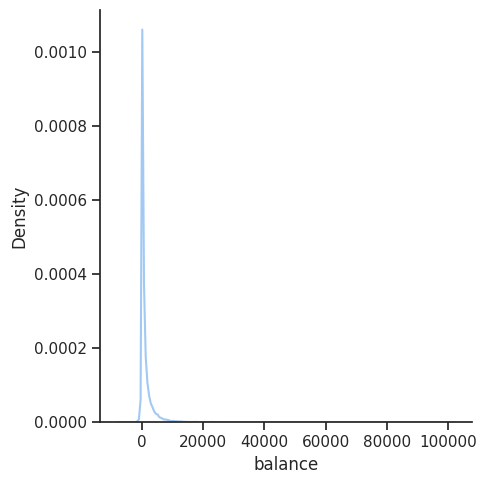

In [20]:
#Histogram Income


df_histogram = df_eval_numerical['balance']
sns.set_theme(style="ticks", palette="pastel")
sns.displot(df_histogram, kind="kde", bw_adjust=.25, height=5);


In [21]:
def histogram_numerical(data):
    variables_spent_foot= [data]
    df_spent_histogram=df_eval_numerical[variables_spent_foot]
    sns.displot(df_spent_histogram, kind="kde", bw_adjust=.25, height=3)
    

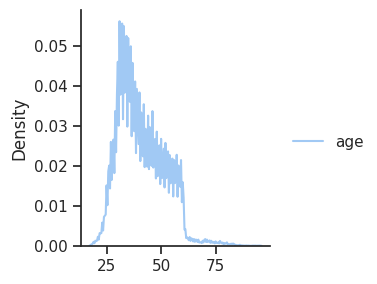

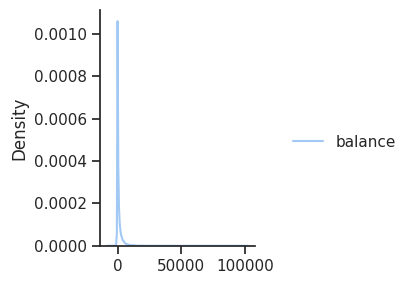

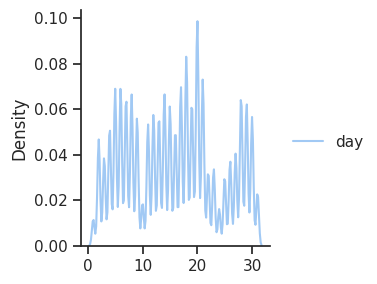

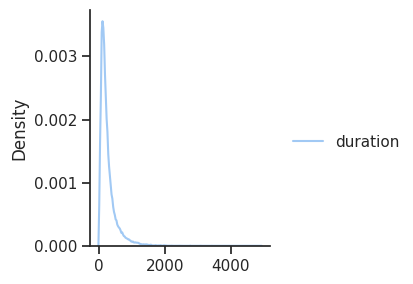

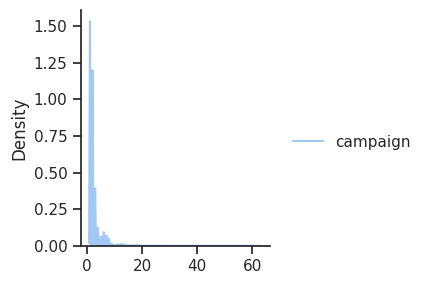

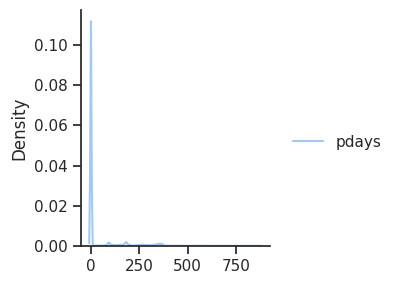

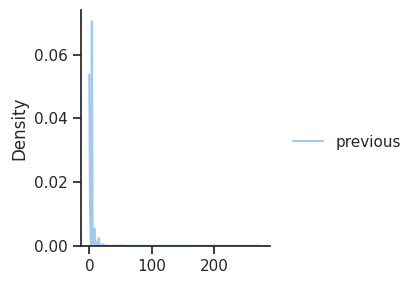

In [22]:
variables_spent_foot= ['age','balance','day','duration','campaign','pdays', 'previous']


for i in variables_spent_foot:histogram_numerical(i)


<Axes: >

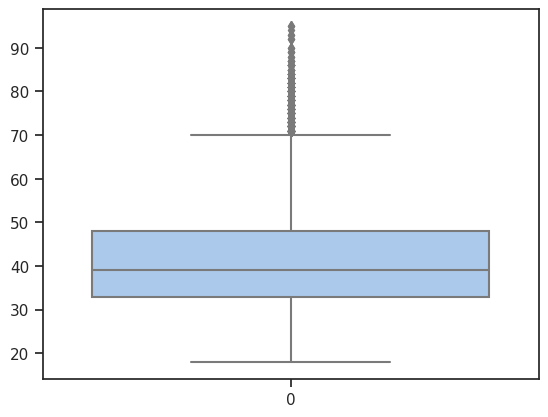

In [23]:
sns.set_theme(style="ticks", palette="pastel")

variables_spent_foot= ['age','balance','day','duration','campaign','pdays', 'previous' ]

sns.boxplot(df_eval['age'])

<Axes: >

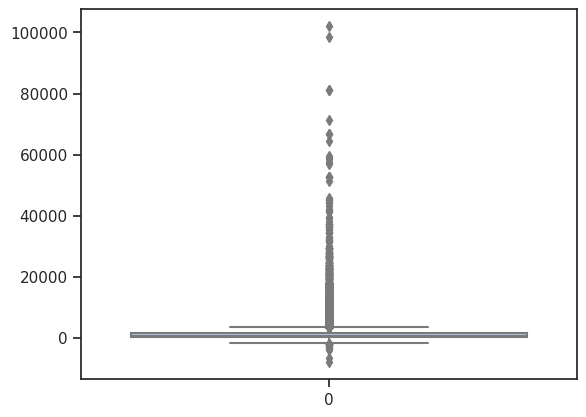

In [24]:
sns.boxplot(df_eval['balance'])

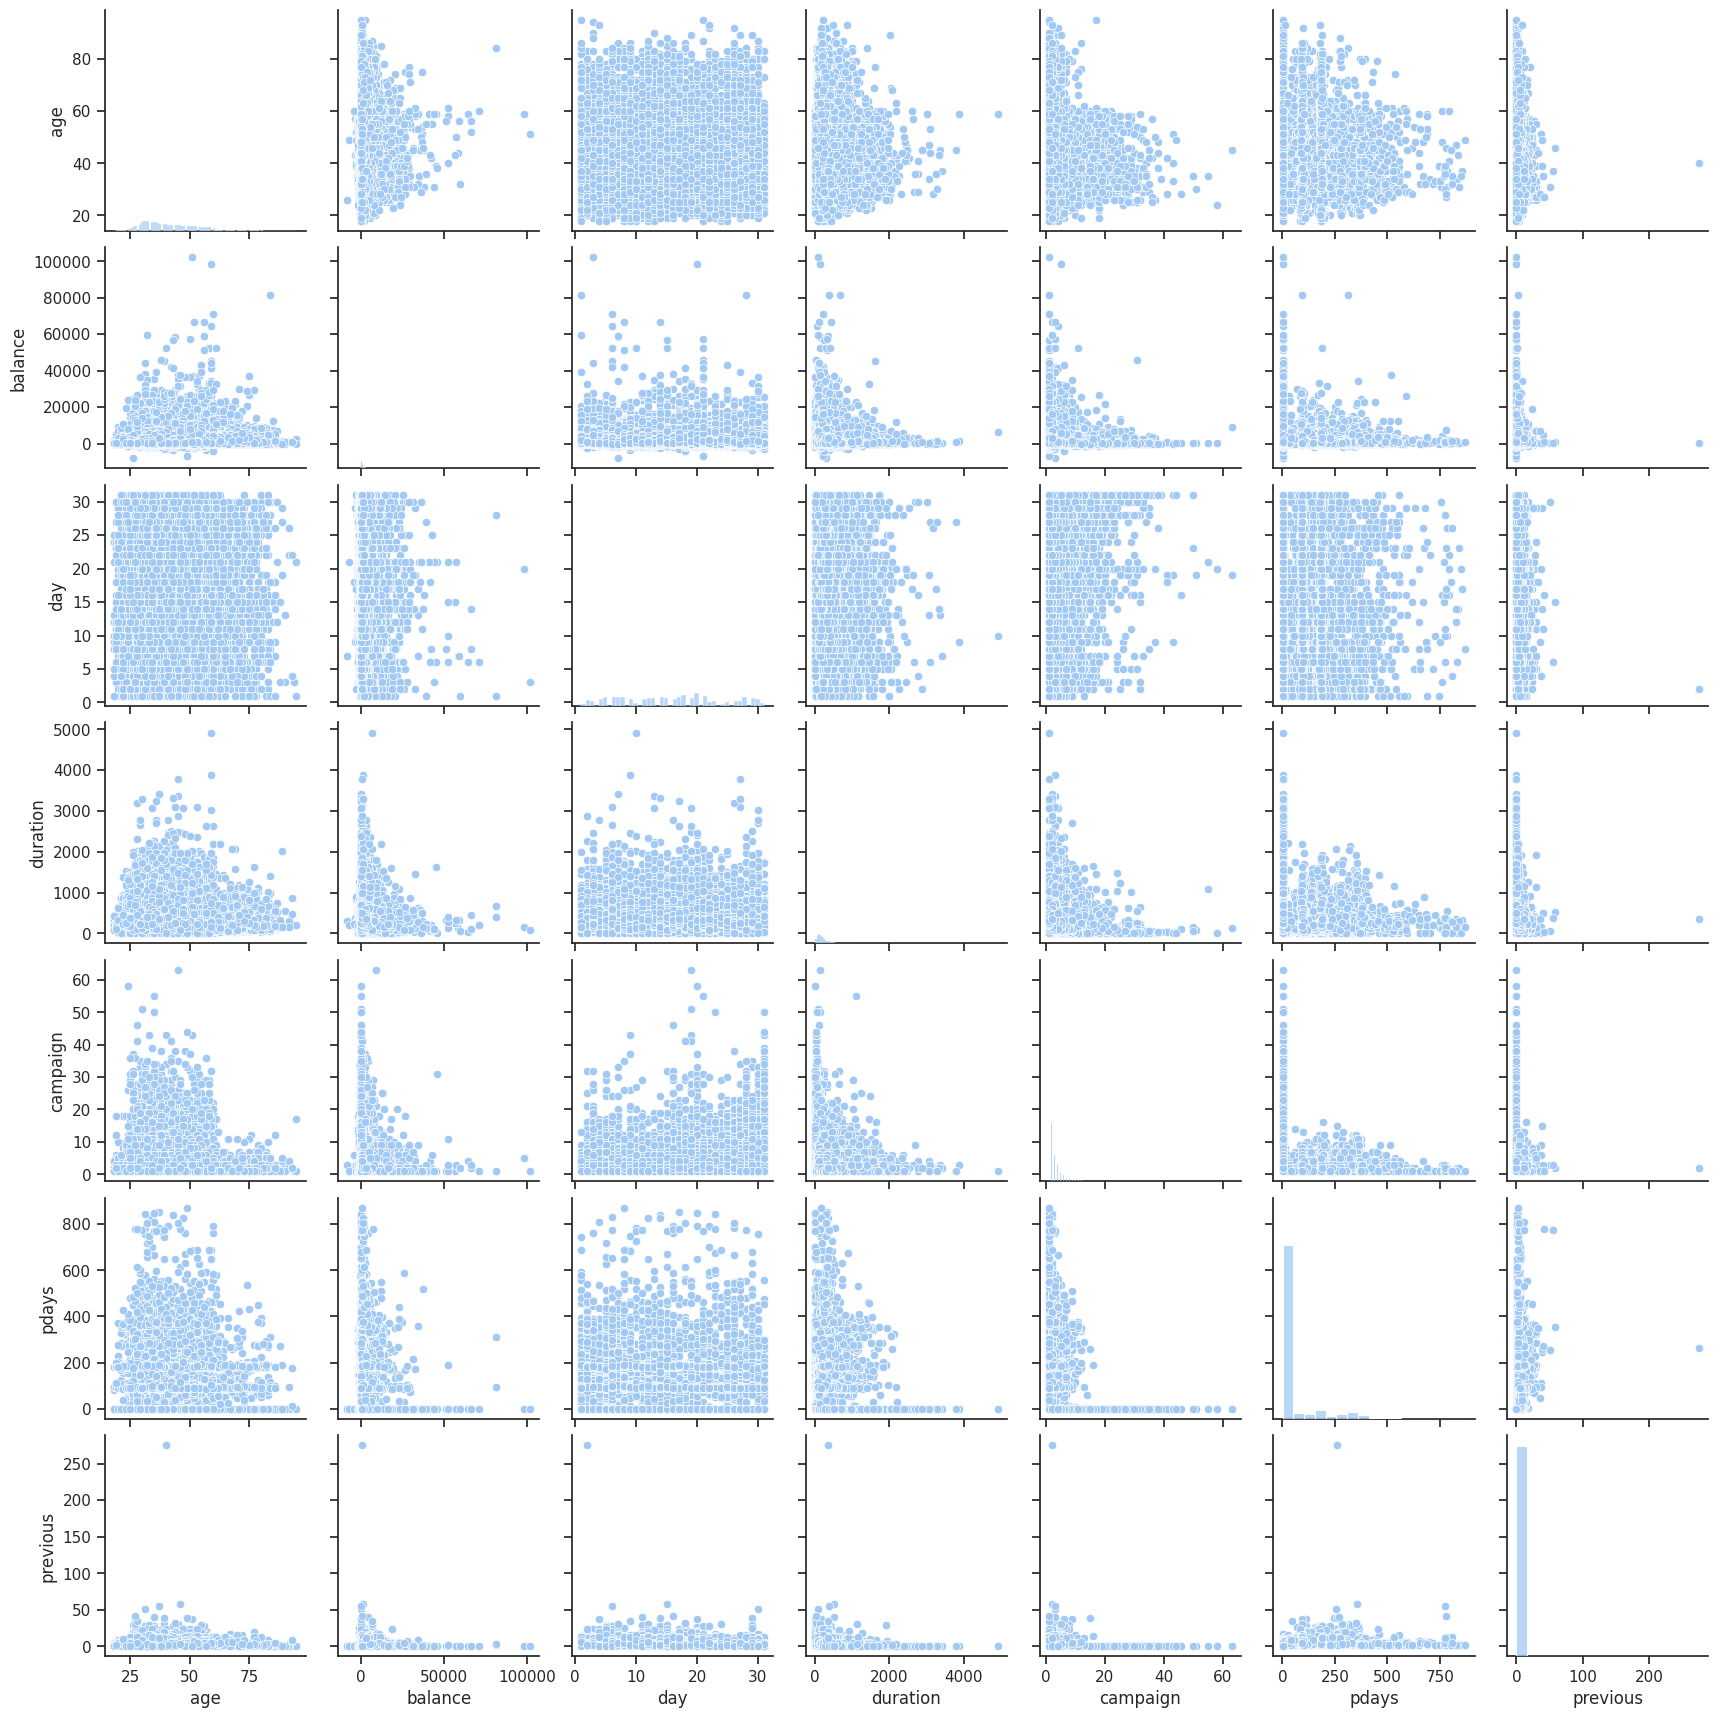

In [25]:
sns.set_theme(style="ticks", palette="pastel")

#variables_numerical= ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntGoldProds', 'Customer_Days' ,'Age' ,'Recency' ]
#df_variables_numerica = df[variables_numerical]
sns.pairplot(data=df_eval_numerical)

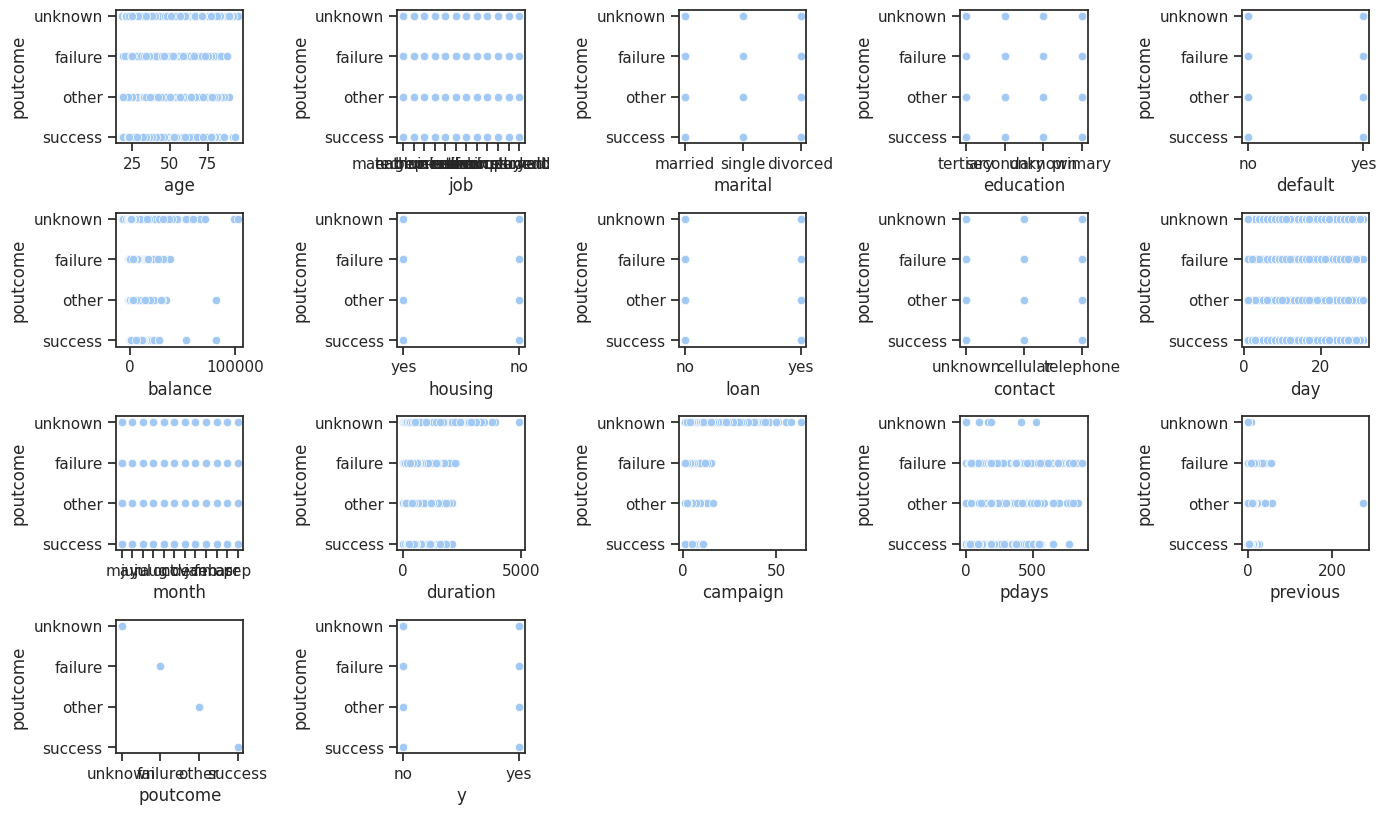

In [26]:
#Lets implement a scatter plot for each variable to understand the behavior with the target

fig = plt.figure(figsize=(14, 20))


Acceptance = df_eval.poutcome
for i in range(len(df_eval.columns)): 
    fig.add_subplot(10,5,i+1)
    sns.scatterplot(x=df_eval.iloc[:,i], y=Acceptance)
    

plt.tight_layout()
plt.show()


# 4. Analysis <a id='seccion4'></a>

In [27]:
from scipy.stats import chi2_contingency

# Crear un DataFrame de ejemplo


# Crear una tabla de contingencia
contingency_table = pd.crosstab(df_eval['age'], df_eval['poutcome'])

# Calcular el coeficiente de contingencia
chi2, _, _, _ = chi2_contingency(contingency_table)

contingency_coefficient = np.sqrt(chi2 / len(df_eval))

print(f"Coeficiente de contingencia: {contingency_coefficient}")

Coeficiente de contingencia: 0.17464283313335074


In [28]:
contingency_array = []
dic = {}


for i in df_eval_category.columns:
    contingency_table = pd.crosstab(df_eval_category[i], df_eval_category['poutcome'])
    # Calcular el coeficiente de contingencia
    chi2, _, _, _ = chi2_contingency(contingency_table)
    contingency_coefficient = np.sqrt(chi2 / len(df_eval))

    contingency_array.append(contingency_coefficient)
    dic[i] = contingency_coefficient

print(dic)
                                    

{'job': 0.11122226140356921, 'marital': 0.04112912225621421, 'education': 0.061750496261836034, 'default': 0.04040319633186609, 'housing': 0.14314717292832757, 'loan': 0.0552479822954597, 'contact': 0.29340862882977725, 'month': 0.3712413317770117, 'poutcome': 1.7320508075688772, 'y': 0.31166261679981033}


In [29]:
indice = ['Fila1']
datos_contingency = pd.DataFrame(dic, index= indice)

In [30]:

contingency_array = []
columnas_array = []


for i in df_eval_category.columns:
    contingency_table = pd.crosstab(df_eval_category[i], df_eval_category['poutcome'])
    # Calcular el coeficiente de contingencia
    chi2, _, _, _ = chi2_contingency(contingency_table)
    contingency_coefficient = np.sqrt(chi2 / len(df_eval))

    contingency_array.append(contingency_coefficient)
    columnas_array.append(i)

Data_contingency_coefficient = {

    'Name': columnas_array,
    'contingency_coefficient': contingency_array
    
}

Data_contingency_coefficient = pd.DataFrame(Data_contingency_coefficient)

In [31]:
Data_contingency_coefficient.sort_values('contingency_coefficient', ascending=False)

,Name,contingency_coefficient
8,poutcome,1.732051
7,month,0.371241
9,y,0.311663
6,contact,0.293409
4,housing,0.143147
0,job,0.111222
2,education,0.061750
5,loan,0.055248
1,marital,0.041129
3,default,0.040403


In [32]:
pd.set_option('display.max_columns', None)
df_eval.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,1,0,unknown,no


In [33]:
df_eval

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,1,0,unknown,no


In [34]:
column_erase= ['y']

df_eval_clean = df_eval.drop(column_erase, axis=1) 

In [35]:
df_eval_clean.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,1,0,unknown


In [36]:
#change the column poutcome with number. 
condition = [(df_eval_clean['poutcome'] == 'unknown'), 
            (df_eval_clean['poutcome'] == 'failure'),(df_eval_clean['poutcome'] == 'other'), (df_eval_clean['poutcome'] == 'success')]

values = [0,0,0,1]

df_eval_clean['poutcome'] = np.select(condition,values, default=0)


In [37]:
df_eval_clean.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,1,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,1,0,0


<Axes: >

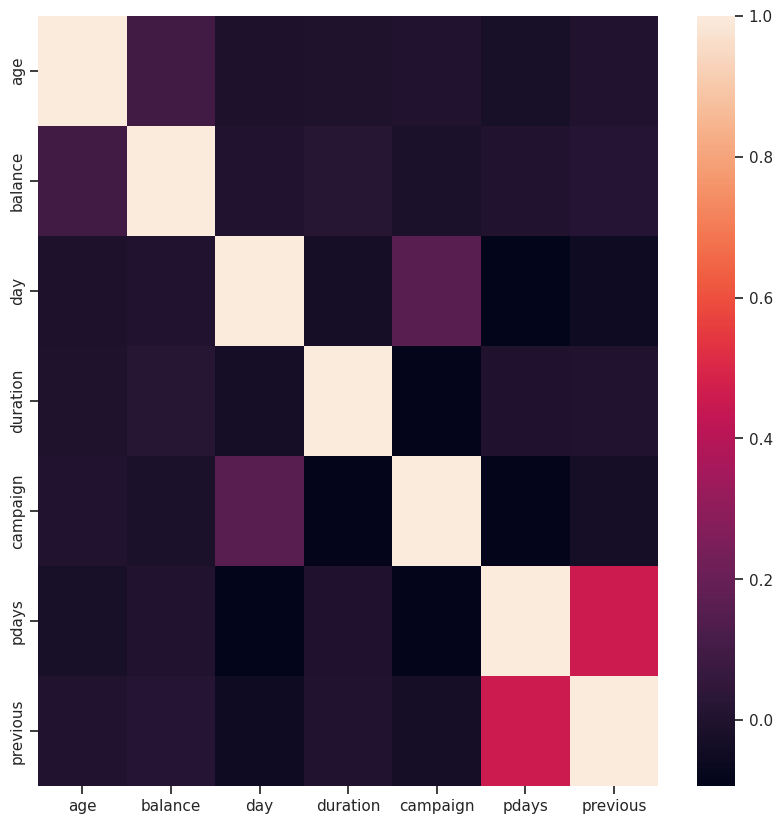

In [38]:
corr = df_eval_numerical.corr()

mask = np.triu(np.ones_like(corr, 'bool'))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.subplots(figsize=(10,10))
sns.heatmap(corr)


<Axes: >

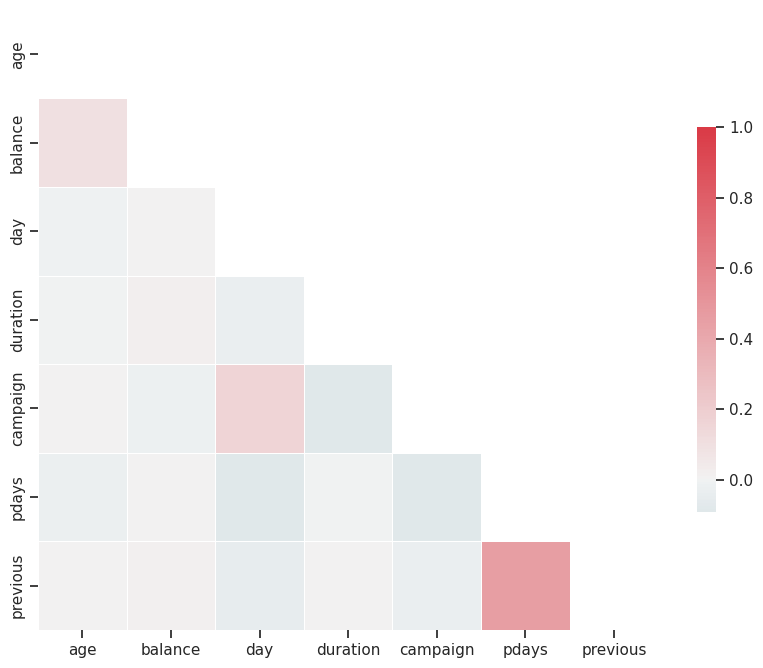

In [39]:
# Draw the heatmap with the mask and correct aspect ratio
corr = df_eval_numerical.corr()
mask = np.triu(np.ones_like(corr, 'bool'))

corr_mask = corr.mask(np.triu(np.ones_like(corr, 'bool')))
corr_unstacked = corr_mask.unstack().sort_values(ascending = False)

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.subplots(figsize=(10,10))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [40]:
pd.DataFrame(corr_unstacked[(abs(corr_unstacked)>0.2)&(abs(corr_unstacked)<1)]).sort_index().style.background_gradient(cmap='coolwarm', low=.5, high=-.7)

,,0
pdays,previous,0.453751


In [41]:
pd.DataFrame(corr_unstacked[corr_unstacked<-.5]).sort_index().style.background_gradient(cmap='coolwarm', low=-.6, high=.5)

,,0


In [42]:
df_eval_clean

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,1,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,1,0,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,1,0,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,1,0,0


In [43]:
Final_Data_Frame = pd.get_dummies(df_eval_clean)

## Result Analysis

1. Eliminated 10 columns that doesn`t represent enought correlation to build the model.
2. Eliminated 5 columns that are the result for each campaign according with the justification to build a unique column to implement the result

# 5. Machine Learning Modeling <a id='seccion5'></a>

## Model Decision Tree

In [44]:
#Define the X variable 
X = Final_Data_Frame.drop(['poutcome'],axis=1)

#Define the target object
y = df_eval_clean['poutcome']

#Split the data in validation and training 
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [45]:
# Define model. Specify a number for random_state to ensure same results each run
marketing_decision_model = DecisionTreeRegressor(random_state=1)

# Fit model
marketing_decision_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [46]:
predicted_marketing = marketing_decision_model.predict(X)
mean_absolute_error(y, predicted_marketing)

0.0

In [47]:
print("Making predictions for the following 5 customer:")
#print(X.head())
print("The predictions are")
print(marketing_decision_model.predict(X.head()))

Making predictions for the following 5 customer:
The predictions are
[0. 0. 0. 0. 0.]


## Model xgboost

In [48]:
modelXGBR = XGBRegressor(random_state=42)
modelXGBR.fit(train_X, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [49]:
y_pred = modelXGBR.predict(val_X)

In [50]:
# Calcular métricas de evaluación
mse = mean_squared_error(val_y, y_pred)
r2 = r2_score(val_y, y_pred)

print(f'MSE (Mean Squared Error): {mse}')
print(f'R2 Score: {r2}')

MSE (Mean Squared Error): 0.02299525741376389
R2 Score: 0.3097332269973281


In [51]:
print("Making predictions for the following 5 first customers:")
#print(X.head())
print("The predictions are")
print(modelXGBR.predict(X.head()))

Making predictions for the following 5 first customers:
The predictions are
[-0.00169578 -0.00085022 -0.00104889 -0.00112556 -0.0010048 ]


# 6. Testing

In [52]:
df_test = pd.read_csv('/kaggle/input/bank-term-deposit-predictions/test.csv')

In [53]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [54]:
#Clean the columns in the same way as we did in the last seccionabs

#change the column poutcome with number. 
condition = [(df_test['poutcome'] == 'unknown'), 
            (df_test['poutcome'] == 'failure'),(df_test['poutcome'] == 'other'), (df_test['poutcome'] == 'success')]

values = [0,0,0,1]

df_test['poutcome'] = np.select(condition,values, default=0)



In [55]:
#change the -1 pdays for 1

#df_eval.pdays = np.where(df_eval.pdays < 0, 1, df_eval.pdays)

df_test.pdays = np.where(df_test.pdays < 0, 1, df_test.pdays)


In [56]:
#Delete Y column 

df_test_clean = df_test.drop(['y'],axis=1)



In [57]:
df_test_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,1,0,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,1,0,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,1,0,0


In [58]:
#implement dummies
df_test_clean_final = pd.get_dummies(df_test_clean)


In [59]:
X_test = df_test_clean_final.drop(['poutcome'],axis=1)

In [60]:
#test the mmodel
y_pred_test = modelXGBR.predict(X_test)

In [61]:
y_pred_test

array([-0.00126175, -0.0173037 , -0.00767547, ..., -0.00066774,
        0.08308697,  0.02149688], dtype=float32)

In [62]:
y_val = df_test_clean_final['poutcome']

In [63]:
mean_absolute_error(y_val, y_pred_test)

0.02491145887128718

# 7. Conclusion <a id='seccion6'></a>



1. The project is a good example of the evaluation of a marketing campaign and how to implement a tool to predict the behavior.
2. The data was treated since there are columns that are not congruent with the study, such as the target that has 4 parameters of which were transformed to 2 to be able to carry out the model.
3. Target data, not really knowing each category, decided to only use the success category as the acceptance category for the campaign and the rest of the categories are considered rejections.
4. . The two model used to create the tool was enought to has a good result according with the data shar with a error around 0.2.
5. The most importand categories to work are month and contact type, it seen that there are some correlation with this two factors. n
